# 使用梯度上升法求解主成分

In [28]:
import numpy as np
import matplotlib.pyplot as plt 

In [36]:
x = np.empty((100,2))
x[:,0] = np.random.uniform(0.,100.,size = 100)
x[:,1] = 0.75*x[:,0] + 3. + np.random.normal(0,10.,size=100)


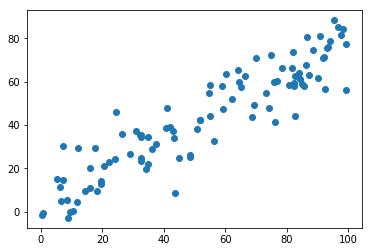

In [37]:
plt.scatter(x[:,0],x[:,1])
plt.show()

## demean均值归零 

In [38]:
def demean(x):
    return x-np.mean(x,axis=0)

In [40]:

x_demean = demean(x)   

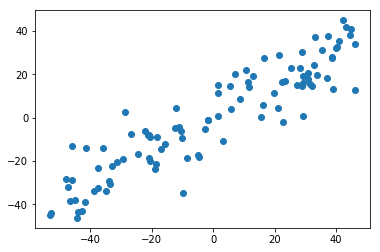

In [41]:
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.show()

In [42]:
np.mean(x_demean[:,0])## 可确认第一列均值基本为0

4.6895820560166614e-15

In [43]:
np.mean(x_demean[:,1])## 可确认第二列均值基本为0

-7.247535904753022e-15

## 梯度上升法 

In [46]:
def f(w,x):
    return np.sum((x.dot(w))**2)/len(x)

In [47]:
def df_math(w,x):
    return x.T.dot(x.dot(w)) * 2 /len(x)

In [54]:
def df_debug(w,x,epsilson=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilson
        w_2 = w.copy()
        w_2[i] -= epsilson
        res[i] = (f(w_1, x) - f(w_2, x)) / (2*epsilson)
    return res
        

In [63]:
def direction(w):
    return w/np.linalg.norm(w)###  w/(w的模)
def gradient_ascent(df ,x , initial_w , eta, n_iters=1e4, epsilson = 1e-8):
    i_iter=0
    w = direction(initial_w)
    while i_iter<n_iters:
        gradient=df(w,x)
        last_w=w
        w=w+eta * gradient  ###迭代 让theta每次都能向导数的正移一步
        w = direction(w) ### 让w的模 为1，成为单位方向向量
        if(abs(f(w,x)-f(last_w,x))<epsilson):
              break
        i_iter+=1
    return w

In [64]:
initial_w = np.random.random(x.shape[1])   # 注意1：初始的开始的方向不能为零
initial_w

array([0.7560404 , 0.86668255])

In [65]:
eta = 0.01 # 注意2：不能使用standscaler进行标准化

In [73]:
w = gradient_ascent(df_debug,x_demean,initial_w,eta)
w

array([0.78955996, 0.61367342])

In [74]:
gradient_ascent(df_math,x_demean,initial_w,eta)

array([0.78955996, 0.61367342])

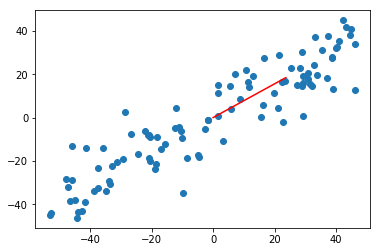

In [75]:
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color = 'r')
plt.show()

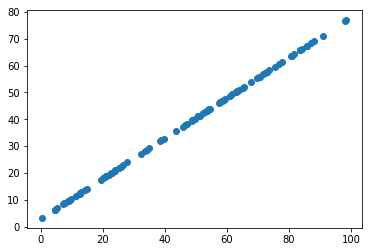

In [77]:
x2 = np.empty((100,2))
x2[:,0] = np.random.uniform(0.,100.,size = 100)
x2[:,1] = 0.75*x2[:,0] + 3. 

plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [80]:
x2_demean =demean(x2)
w2 = gradient_ascent(df_math,x_demean,initial_w,eta)

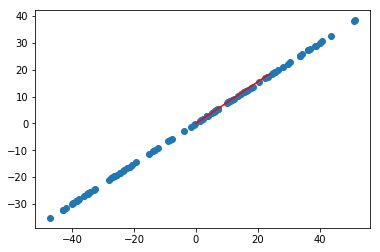

In [81]:
plt.scatter(x2_demean[:,0],x2_demean[:,1])
plt.plot([0,w2[0]*30],[0,w2[1]*30],color = 'r')
plt.show()